In [1]:
%matplotlib inline
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\GK228823\\Downloads\\COVID-19_Daily_Counts_of_Cases__Hospitalizations__and_Deaths.csv',
                 parse_dates=['date_of_interest']) 

In [3]:
print(df)

    date_of_interest  CASE_COUNT  PROBABLE_CASE_COUNT  HOSPITALIZED_COUNT  \
0         2020-02-29           1                    0                   1   
1         2020-03-01           0                    0                   1   
2         2020-03-02           0                    0                   2   
3         2020-03-03           1                    0                   7   
4         2020-03-04           5                    0                   2   
..               ...         ...                  ...                 ...   
895       2022-08-12        1947                  589                 103   
896       2022-08-13        1238                  445                  73   
897       2022-08-14        1250                  442                  89   
898       2022-08-15        2492                  661                  60   
899       2022-08-16        2161                  625                   8   

     DEATH_COUNT  PROBABLE_DEATH_COUNT  CASE_COUNT_7DAY_AVG  \
0           

In [4]:
df.head()

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,PROBABLE_DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,...,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_PROBABLE_DEATH_COUNT,SI_PROBABLE_CASE_COUNT_7DAY_AVG,SI_CASE_COUNT_7DAY_AVG,SI_ALL_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,SI_ALL_DEATH_COUNT_7DAY_AVG,INCOMPLETE
0,2020-02-29,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-03-01,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-03-02,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-03-03,1,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-03-04,5,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
for col in df.columns:
    print(col)

date_of_interest
CASE_COUNT
PROBABLE_CASE_COUNT
HOSPITALIZED_COUNT
DEATH_COUNT
PROBABLE_DEATH_COUNT
CASE_COUNT_7DAY_AVG
ALL_CASE_COUNT_7DAY_AVG
HOSP_COUNT_7DAY_AVG
DEATH_COUNT_7DAY_AVG
ALL_DEATH_COUNT_7DAY_AVG
BX_CASE_COUNT
BX_PROBABLE_CASE_COUNT
BX_HOSPITALIZED_COUNT
BX_DEATH_COUNT
BX_PROBABLE_DEATH_COUNT
BX_CASE_COUNT_7DAY_AVG
BX_PROBABLE_CASE_COUNT_7DAY_AVG
BX_ALL_CASE_COUNT_7DAY_AVG
BX_HOSPITALIZED_COUNT_7DAY_AVG
BX_DEATH_COUNT_7DAY_AVG
BX_ALL_DEATH_COUNT_7DAY_AVG
BK_CASE_COUNT
BK_PROBABLE_CASE_COUNT
BK_HOSPITALIZED_COUNT
BK_DEATH_COUNT
BK_PROBABLE_DEATH_COUNT
BK_CASE_COUNT_7DAY_AVG
BK_PROBABLE_CASE_COUNT_7DAY_AVG
BK_ALL_CASE_COUNT_7DAY_AVG
BK_HOSPITALIZED_COUNT_7DAY_AVG
BK_DEATH_COUNT_7DAY_AVG
BK_ALL_DEATH_COUNT_7DAY_AVG
MN_CASE_COUNT
MN_PROBABLE_CASE_COUNT
MN_HOSPITALIZED_COUNT
MN_DEATH_COUNT
MN_PROBABLE_DEATH_COUNT
MN_CASE_COUNT_7DAY_AVG
MN_PROBABLE_CASE_COUNT_7DAY_AVG
MN_ALL_CASE_COUNT_7DAY_AVG
MN_HOSPITALIZED_COUNT_7DAY_AVG
MN_DEATH_COUNT_7DAY_AVG
MN_ALL_DEATH_COUNT_7DAY_AVG
Q

In [6]:
selected_columns = df[["date_of_interest","CASE_COUNT"]]

In [7]:
df_copy = selected_columns.copy()
print(df_copy)

    date_of_interest  CASE_COUNT
0         2020-02-29           1
1         2020-03-01           0
2         2020-03-02           0
3         2020-03-03           1
4         2020-03-04           5
..               ...         ...
895       2022-08-12        1947
896       2022-08-13        1238
897       2022-08-14        1250
898       2022-08-15        2492
899       2022-08-16        2161

[900 rows x 2 columns]


In [8]:
#rename columns
df_copy.columns = ['date', 'case']

In [9]:
#check data types
df_copy.dtypes

date    datetime64[ns]
case             int64
dtype: object

In [10]:
#create year-month column
df_copy['year-month'] = df_copy['date'].dt.strftime('%Y-%m')

In [11]:
df_copy.head()

,date,case,year-month
0,2020-02-29,1,2020-02
1,2020-03-01,0,2020-03
2,2020-03-02,0,2020-03
3,2020-03-03,1,2020-03
4,2020-03-04,5,2020-03


In [13]:
#group by year-month
gb = df_copy.groupby('year-month')

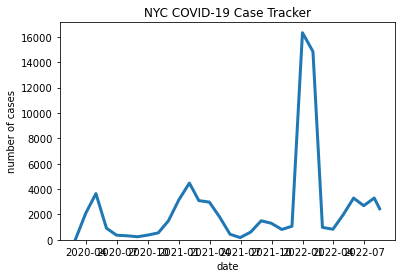

In [14]:
#plot a line chart
fig, ax = plt.subplots(1, 1)
ax.set_title('NYC COVID-19 Case Tracker')
ax.plot_date(gb['date'].max(),
             gb['case'].mean(), '-', lw=3)
ax.set_xlabel('date')
ax.set_ylabel('number of cases')
ax.set_ylim(0)

#save plot image
plt.savefig('NYC COVID-19 Case Tracker.jpg')